# Import Package

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# cleaning data

In [10]:
namaKolom = ['distance_from_home', 'distance_from_last_transaction',
             'ratio_to_median_purchase_price', 'repeat_retailer',
             'used_chip', 'used_pin_number', 'online_order', 'fraud']

filePath = 'card_transdata.csv'
data = pd.read_csv(filePath, header=None, names=namaKolom, skipinitialspace=True, encoding='utf-8')

for kolom in data.columns:
    data[kolom] = pd.to_numeric(data[kolom], errors='coerce')
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

print("Nilai yang Hilang:")
print(data.isnull().sum())
print("\nUkuran Dataset:")
print(data.shape)


<ipython-input-10-11cea76abd0d>:6: DtypeWarning: Columns (0,1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filePath, header=None, names=namaKolom, skipinitialspace=True, encoding='utf-8')


Nilai yang Hilang:
distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

Ukuran Dataset:
(1000000, 8)


# visualisasi data

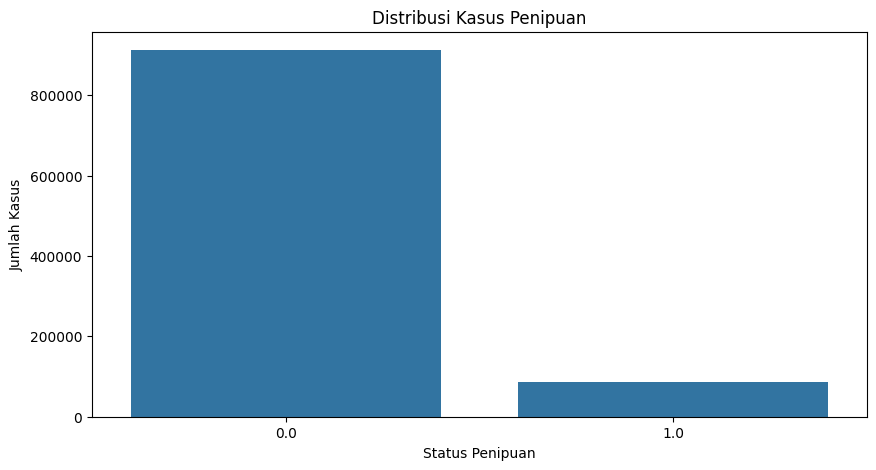

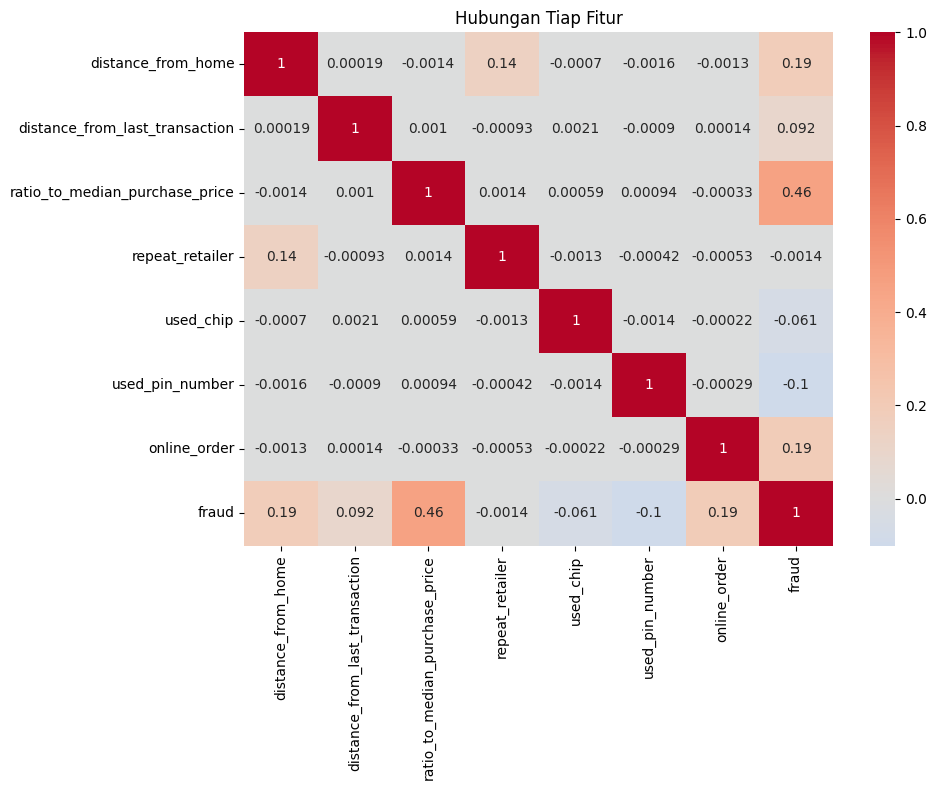

In [11]:
# barchar
plt.figure(figsize=(10, 5))
sns.countplot(x='fraud', data=data)
plt.title('Distribusi Kasus Penipuan')
plt.xlabel('Status Penipuan')
plt.ylabel('Jumlah Kasus')
plt.show()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Hubungan Tiap Fitur')
plt.tight_layout()
plt.show()

# melatih model Random Forest Classifier

In [13]:
X = data.drop('fraud', axis=1)
y = data['fraud']

xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)
klasifierRF = RandomForestClassifier(n_estimators=100, random_state=42)
klasifierRF.fit(xTrainScaled, yTrain)

yPred = klasifierRF.predict(xTestScaled)

print("\nLaporan Klasifikasi:")
print(classification_report(yTest, yPred))


Laporan Klasifikasi:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    182557
         1.0       1.00      1.00      1.00     17443

    accuracy                           1.00    200000
   macro avg       1.00      1.00      1.00    200000
weighted avg       1.00      1.00      1.00    200000



# kontribusi tiap fitur

In [14]:
kontribusiFitur = pd.DataFrame({
    'fitur': X.columns,
    'kontribusi': klasifierRF.feature_importances_
}).sort_values('kontribusi', ascending=False)

print("\nKontribusi terhadap Akurasi Model:")
print(kontribusiFitur)


Kontribusi terhadap Akurasi Model:
                            fitur  kontribusi
2  ratio_to_median_purchase_price    0.528102
6                    online_order    0.170432
0              distance_from_home    0.134641
5                 used_pin_number    0.062658
4                       used_chip    0.051292
1  distance_from_last_transaction    0.046187
3                 repeat_retailer    0.006690
